# Import libraries and Data
The first step is to import the libraries needed and import the csv file containing the data I will be looking at. 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [9]:
df_loans = pd.read_csv('loan_data.csv')

In [10]:
df_loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [11]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [13]:
df_loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

Using Pandas and Seaborn, we want to create some visualizations to help formulate some initial insights about this data set.


This histogram shows the two FICO distributions on top of one another for each credit policy outcome (credit.policy.outcome column). The FICO distribution for Credit.Policy=1 appears on first glance to have a higher FICO score than when Credit.Policy=0. 

Text(0.5, 0, 'FICO')

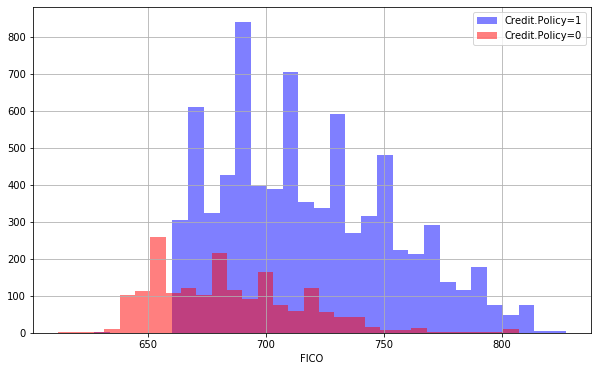

In [15]:
plt.figure(figsize=(10,6))
df_loans[df_loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
df_loans[df_loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

This histogram shows the two FICO distributions on top of one another for each outcome in the not.fully.paid column. Customers who have not fully paid off their loan generally appear to have a lower credit score than those who do. 

Text(0.5, 0, 'FICO')

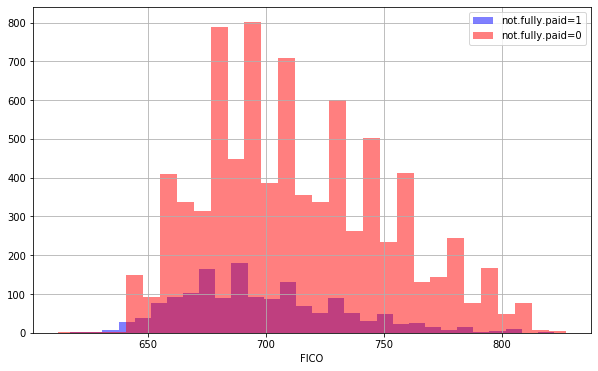

In [19]:
plt.figure(figsize=(10,6))
df_loans[df_loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
df_loans[df_loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

This countplot show the loans categorized by purpose with the color hue defined by the not.fully.paid column. This plot shows that the largest number of loans appear to be from the debt_consolidation category. 

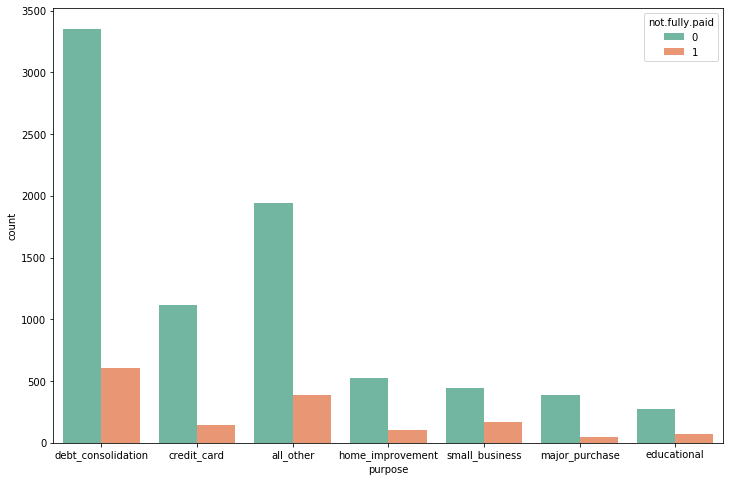

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(x='purpose',hue='not.fully.paid',data=df_loans, palette='Set2')

A jointplot shows a relationship between interest rate a borrower recieves and the FICO score of the borrower. Generally the higher a borrowers FICO score, the better rate the borrower will recieve. 

/Users/carpemc/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


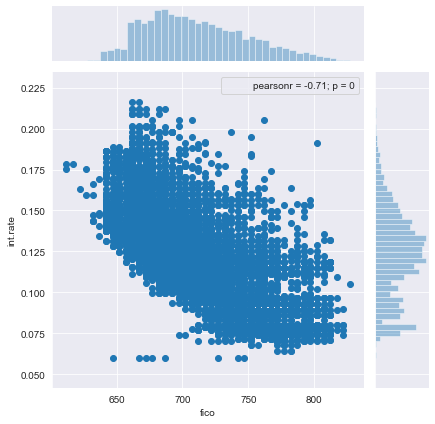

In [33]:
sns.set_style("darkgrid")
sns.jointplot(x='fico',y='int.rate',data=df_loans).annotate(stats.pearsonr)

# lmplot
The lmplot will help us see if the trend differed between not.fully.paid and credit.policy.

<Figure size 864x576 with 0 Axes>

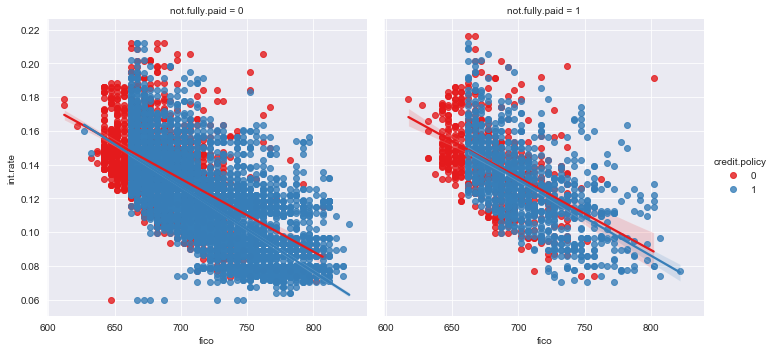

In [36]:
plt.figure(figsize=(12,8))
sns.lmplot(y='int.rate',x='fico',data=df_loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

# Data Preparation For Random Forest Model

In [37]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [38]:
cat_features = ['purpose']

In [42]:
final_data = pd.get_dummies(df_loans,columns=cat_features,drop_first=True)

In [43]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

# Test-Train Split
The dataset will now be split into a training set and a testing set. 

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Training the Decison Tree Model

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dtree = DecisionTreeClassifier()

In [49]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Decision Tree Evaluation

In [50]:
pred = dtree.predict(X_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.18      0.22      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [53]:
print(confusion_matrix(y_test,pred))

[[2003  428]
 [ 347   96]]


# Training the Random Forest Model

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc = RandomForestClassifier(n_estimators=600)

In [57]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Now that the Random Forest Model is Trained, it's time for predicitons and evaluation of the model. 

In [58]:
predictions = rfc.predict(X_test)

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.61      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.73      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



In [62]:
print(confusion_matrix(y_test,predictions))

[[2424    7]
 [ 432   11]]


# Conclusions:

There isn't a very big difference between the two models, both precision and recall are not great for either. The Random Forest Model performed a little better overall but individual metrics varied between the two models, so it really depends on what metric you optimize for. For example the single descison tree model performed better on class one for recall than the random forest model. Alternatively, the precision for class one in the Random Forest Model was much higher than the Single Decision Tree.  